# An introduction to probability therory for machine learning

# Uncertainty
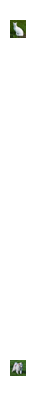

# Uncertainty
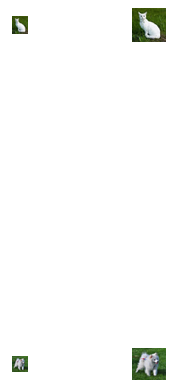

# Uncertainty
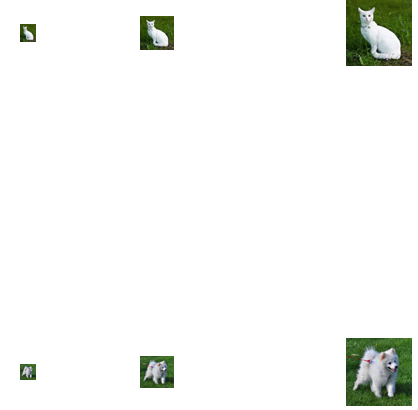

# Uncertainty
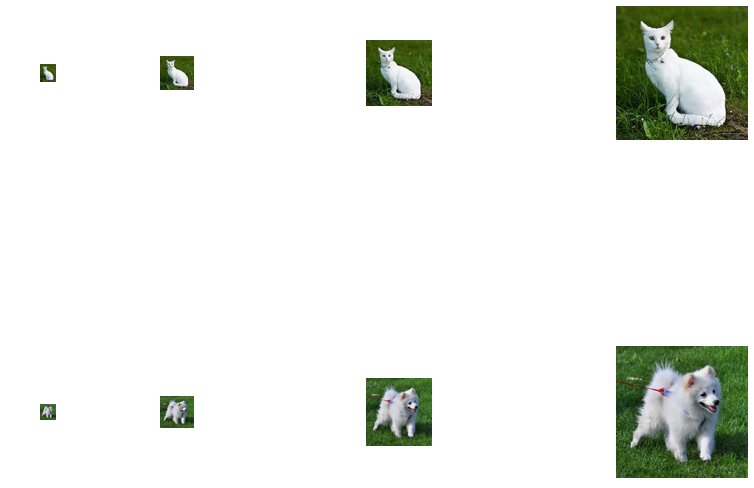

# Uncertainty
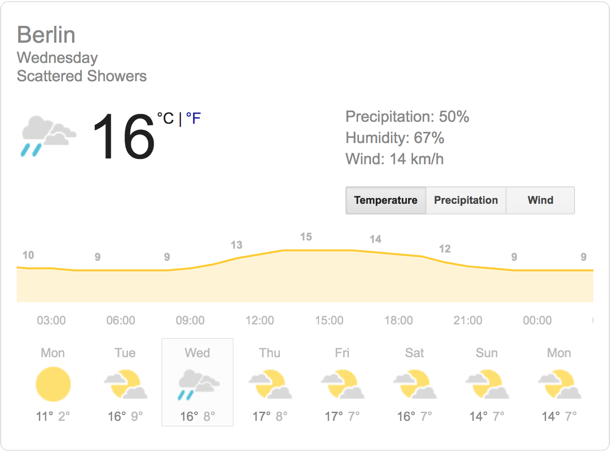

# I like this programme ...
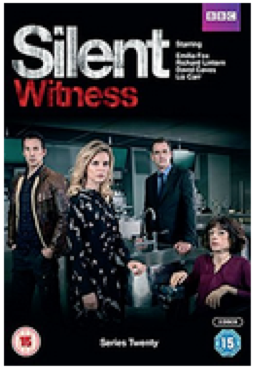

# Will I like any of these?
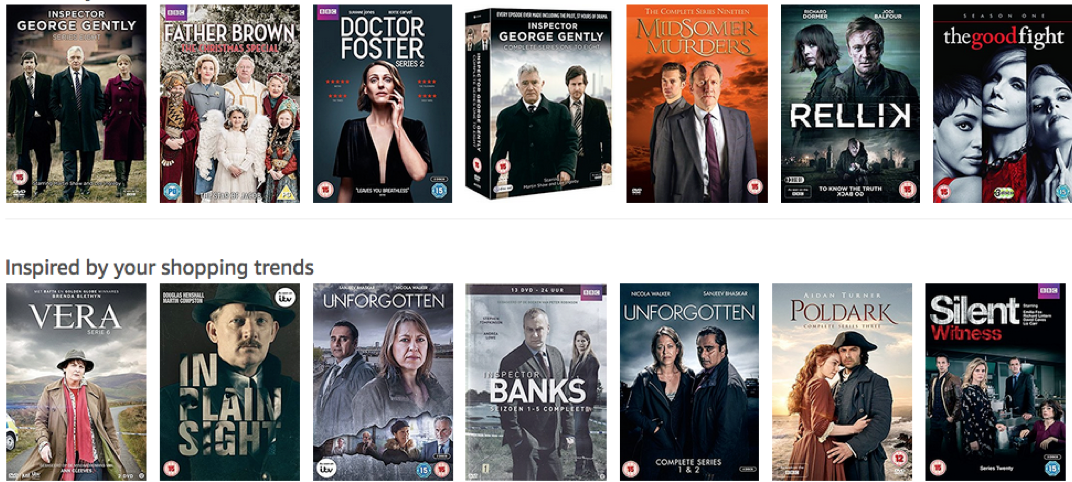

- We use probability to represent uncertainly. We often make decisions based on probability.

- Probabilty theory is nothing but common sense, reduced to calculation - Pierre Laplace

# Notation
- A random variable X represents the outcomes of the real world.
- $P(x)$ is probability of event $x = X$.
- Sample Space is the space of all possible outcomes.
- It can be sicrete, continuous, or mixed.
- Example: In case of tossing a coin:
 - Sample Sapce = {H, T}
 - $P(x = T) = P(x = H) = 0.5$
- Example: Percipitation or temperature have a continuous sample space.

# Probability Density Function
- $P(x)$ is a probability density (mass) function and assigns a likelihood value to every point in a smaple space.
- All likelihood values are non-negative.
- All values sum to 0.
- Example:
$$
Sample Sapce = \{H, T\}\\
p(x = T) = p(x = H) = 0.5\\
\sum_{e\epsilon\{T,H\}}{p(x=e)} = p(x=T) + p(x=L) = 0.5+0.5 = 1
$$


# Count
- likelihood is assigned based on a counting how many time an event occurs in a sample.
- In statistics we call this process of drawing examples from probability distributions sampling.
- Example: If we roll a dice and the dice is not loaded we expect that each number has an equiprobability of $\frac{1}{6}$ 
- Example: Checking fairness of a die.

In [2]:
import mxnet as mx
from mxnet import nd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


# Rolling a dice
- we are building a equiprobability for rolling a dice

In [3]:
probabilities = nd.ones(6) / 6
print(probabilities, probabilities.sum())
print(nd.random.multinomial(probabilities, shape=(5,10)))


[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
<NDArray 6 @cpu(0)> 
[1.]
<NDArray 1 @cpu(0)>

[[3 3 4 5 3 5 3 5 2 3]
 [3 2 2 1 5 0 5 1 2 2]
 [4 4 3 2 3 2 5 5 0 2]
 [0 3 0 2 4 5 4 0 5 5]
 [5 2 4 4 2 3 4 4 0 4]]
<NDArray 5x10 @cpu(0)>


# Sampling
- We are now rolling the dice 1000 times
- Then we print the total for each number, which is our sample
- We print the sampled total for each number
- We observe that total of sampled roll is 1
- We will repeat the experiment for 10000 rolls

In [4]:
samples = 1000
rolls = nd.random.multinomial(probabilities, shape=(samples))
counts = nd.zeros((6,samples))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
density = totals/samples
print("total rolls: {}".format(totals))
print("density: {}".format(density))
print("sum of density {}, variance: {:6.4%}".format(density.sum(), density.asnumpy().var()))

total rolls: 
[165. 169. 174. 160. 159. 173.]
<NDArray 6 @cpu(0)>
density: 
[0.165 0.169 0.174 0.16  0.159 0.173]
<NDArray 6 @cpu(0)>
sum of density 
[1.]
<NDArray 1 @cpu(0)>, variance: 0.0034%


In [5]:
x = nd.arange(samples).reshape((1,samples)) + 1
estimates = counts / x

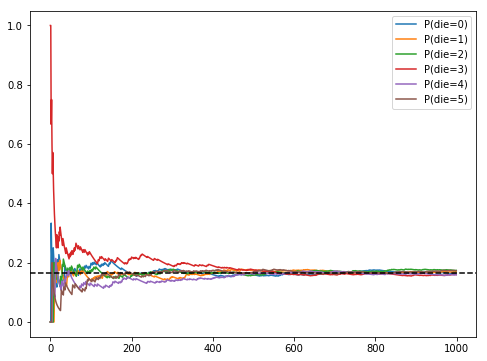

In [6]:
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

In [7]:
samples = 10000
rolls = nd.random.multinomial(probabilities, shape=(samples))
counts = nd.zeros((6,samples))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
density = totals/samples
print("total rolls: {}".format(totals))
print("density: {}".format(density))
print("sum of density {}, variance: {:6.4%}".format(density.sum(), density.asnumpy().var()))

total rolls: 
[1677. 1678. 1630. 1642. 1675. 1698.]
<NDArray 6 @cpu(0)>
density: 
[0.1677 0.1678 0.163  0.1642 0.1675 0.1698]
<NDArray 6 @cpu(0)>
sum of density 
[1.]
<NDArray 1 @cpu(0)>, variance: 0.0005%


In [8]:
x = nd.arange(samples).reshape((1,samples)) + 1
estimates = counts / x

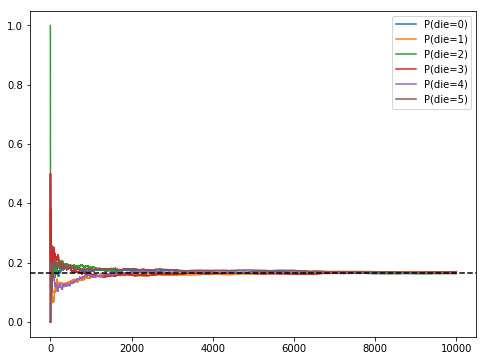

In [9]:
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(die=" + str(i) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

# Observation
- Increasing the number of samples results in a more evently distributed output

# Joint Probability Distriution
- $p(X=x, Y=y)$ is probability density of co-occurance of two events x, y.p
- Joint probability is calculated by multiplying probability of each event.
- Useful when we want to know if two things happen together.

      - Example: What is probability of rolling a double 5? 

$$P(x=5, y=5) = P(5) \times P(5) = 0.1667\times0.1667= 0.0278$$

## Excercize
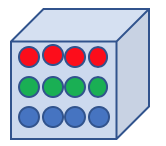
- What is the probability of taking a red **AND** a green ball from the box? 

## Solution
$$p(red, green) = p(red) * p(green) = \frac{1}{3}*\frac{1}{3}=\frac{1}{9}$$

# Conditional Probability Distribution
- $p(X=x|Y=y)$ expressed probability of an event occuring given that another event has already happend.
 - Example: probability of coughing given that you have a cold.
- $p(Y|X) = \frac{\large{p(X,Y)}}{\large{p(Y)}}\ or\ p(X,Y) = p(Y|X)p(X)$
- Useful when we want to infer one thing from another.

## Excercize
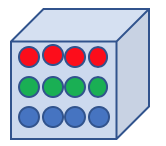
- What is the probability of taking a red **after having taken** a green ball from the box? 

# Sum Rule
- If two events are mutually exclusive, probability of the their occurance is the sum of their probability.
 - Rolling 2 and 5 on the same dice are mutually exclusive. Probability of rolling a 2 or a 5 os $p(2 \cup 5) = p(2)+p(5) = \frac{1}{6}+\frac{1}{6}=\frac{1}{3}$

## Excercize
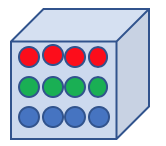
- What is the probability of taking a red or a green ball from the box? 

## Solution
$$p(red\ OR\ green) = p(red) + p(green) = \frac{4}{12}+\frac{4}{12}=\frac{8}{12}=\frac{2}{3}$$

# Bayes' Rule
- if we would like to reverse the conditionality and calcualte the probability of the posterior from prior distribution (unobservered from observed) we use Bayes' rule.
- $p(X|Y) = \large{\frac{p(Y|X)p(X)}{p(Y)}}$

## Example: 
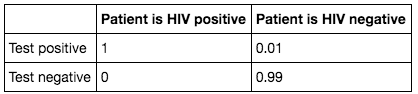

- For a positive test, what is the chance that patient is HIV positive?
- $p(HIV positive)$ for the population is 0.0015.

## Solution
- D: Diagnosis; H: HIV Statis
- previous table denoted p(D|H)
$$
p(test\ positive) = p(D=1) = p(D=1|H=0)p(H=0)+p(D-1|H=1)p(H=1)) = 0.01\times 0.9985 + 1\times 0.005 = 0.11485
$$

$$
p(H=1|D=1) = \frac{p(D=1|H=1)p(H=1)}{p(D=1)} = \frac{1\times 0.0015}{0.011485} = 0.131
$$
- Even with a very accurate test (99% accuracy), still the chance of actually being HIV positive is 13%. This is rather counterintuitive. 

# Intependence
- Intuitively, two random variables are independent if one event does not influce the occurence of the other.
- We can formalize this as: 
$$
X\bot Y\iff p(X|Y) = p(X)
$$
- Example: 
  - Two succesive rolls of a dice.
  - Gambler's fallacy: an individual erroneously believes that a certain random event is less likely or more likely, given a previous event or a series of events. 


# Conditional Independence
- Two events X, Y are conditionally independent given an event Z if $p(X,Y|Z) = p(X|Z)p(Y|Z)$
- If X, Y are conditionally independent given Z, $p(X|Y, Z)=p(X|C)$

- Given the horrible news and the false alarm from the previous test, as a probability theory expert we should recommend the patiet to get a second opinion.
- A new test is slightly less accurate.
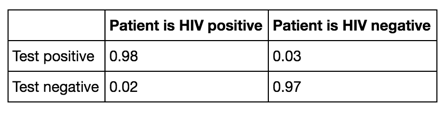

## Solution
$$
p(D_1=1\ and\ D_2=1|H=0)=0.01\times 0.03 = 0.0003
p(D_1=1\ and\ D_2=1|H=1)=1\times 0.098 = 0.98
p(D_1=1\ and\ D_2=1)=0.0003\times 0.09985 + 0.98\times 0.0015 = 0.00176955
p(H=1|D_1=1\ and\ D_2=1) = {\frac{0.98\times 0.0015}{0.00176955}} = 0.831
$$
- Now there is a 83% confidence that the test is conducted correctly.

# Sampling
- We often need to select random variable from a set of random variables. 
- Randome variables can be distributed based on certain patterns that represent different characteristics or simplify the problem.
- We can sample random data from various distributions. Distributions can have certain characteristics

### Continuous
- A continuous distribution describes the probabilities of the possible values of a continuous random variable.
- Examples:
  - Normal or Gaussian
  - Gamma
  - Log Normal

### Discrete
- A discrete distribution describes the probability of occurrence of each value of a discrete random variable. 
- Examples:
  - Bernulli
  - Poisson
  - Binomial

### Multivariate distribution
- A generalization of the one-dimensional (univariate) normal distribution to higher dimensions.
- Examples:
  - multivariant-normal
  - matrix-normal
  - random correlation

![](distribution.png)

## Uniform Distribution
- A distribution with constant probability.
- The chance that a sample falls in any interval of the same size is teh same.
- ```python
uniform = nd.random_uniform(low=-1, high=1, shape=(1000,1))
```


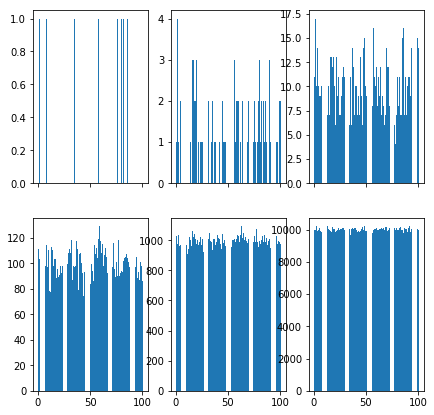

In [10]:
import math, random

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=True)
axes = axes.reshape(6)
# mangle subplots such that we can index them in a linear fashion rather than
# a 2d grid
for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

## Normal (Gaussian) Distribution
- A normal distribution can be identified by its mean, $\mu$ and its variance, $\sigma^2$
- Probability density function for a normal distrbution is $p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
- In standard normal distribution $\mu = 0$ and $\sigma^2=1$ and thus,
- $p(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$
- An arbitrary normal distributoin can be converted to a standard notmal distribution.
- ```python
uniform = nd.random_normal(loc=0, scale=1, shape=(1000,1))
```


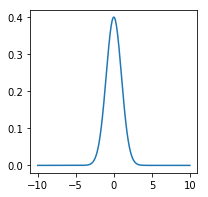

In [11]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(3, 3))
plt.plot(x, p)
plt.show()